In [149]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy.stats import kstest, norm
from numpy.random import choice

<h3> A. Function that returns 1-D Array of 200 i.i.d. draws </h3>

In [150]:
def tea_time(BG, d):
    return BG.standard_t(d, size=200)

print(tea_time(np.random.default_rng(), 5))

[ 0.99664416  1.32868533  0.68141569  1.55063467 -1.1016776  -0.4999242
 -0.484545    0.03465076  0.42499206 -0.17872206 -0.19136011  1.15146839
  0.85605226 -0.41637127  1.80227626  0.161568   -1.97011595  0.26080303
 -0.07648948 -0.32343803  0.26665712 -0.07407483  1.24566387 -0.42095837
  0.27660579 -0.90903712 -2.01179043 -0.70069865  0.24371707  1.70720348
 -1.24952146  0.39862068 -0.38414013 -0.81778571  0.97690158  1.34397682
 -2.11527867  0.27953806  0.784837    0.71630894 -0.64125207 -1.39032688
 -0.38042512 -1.63054565  0.23986372  0.05884165  0.79092741 -1.58583703
 -2.3530442   0.79029585 -0.54705223 -0.52507975 -0.59752363  0.82450267
 -1.3272782  -0.92906652 -0.20276588  0.29814287  1.47113901 -0.07830058
  0.04603715  0.65920199 -0.33011511  1.08327669 -0.28320918 -0.9415777
  2.71624198  0.32460172 -0.93069661  1.51582641  0.81183151 -1.13608142
  0.37021641 -2.0556192  -0.47804866 -2.1556993   0.86599689  1.2121268
 -0.61116847  0.32014598  0.0375895  -0.09259578 -0.32

<h3> B. Function that returns 1-D array dependent on replacement parameter </h3>

In [151]:
def BGAR(bg, a, r: bool):
    return bg.choice(a, size=len(a), replace=r)

Testing code using 1 example Array:

In [152]:
example_array = np.random.standard_t(5, size=10)

BGAR1 = BGAR(np.random.default_rng(), example_array, True)
BGAR2 = BGAR(np.random.default_rng(), example_array, False)

print(f"Random Draws with Replacement: {BGAR1}")
print(f"Random Draws without Replacement: {BGAR2}")

Random Draws with Replacement: [ 0.25931353  1.22272879  1.22272879  2.49185677  2.49185677  1.22272879
  0.25931353  1.69473587 -0.21632904  1.58188758]
Random Draws without Replacement: [-0.654019    1.77973116  0.25931353  1.22272879  2.49185677  1.69473587
 -1.44875661  1.58188758 -0.21632904  0.18202488]


<h3> C. Function that returns probaility plot of 1-D array vs. a N(0,1) distribution. </h3>

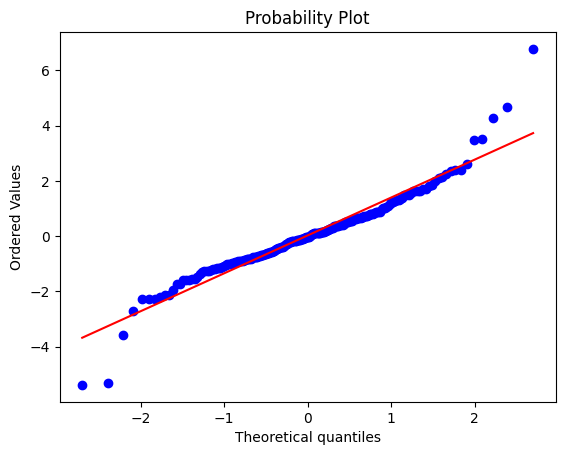

In [153]:
def pplot(s):
    probplot(s, dist="norm", plot=plt)
    plt.show()


pplot(np.random.default_rng().standard_t(5, size=200))

<h3> D. Function that returns probability of rejecting H0 of a Kolmogorov-Smirnov test dependent on 1-D array. </h3>

In [154]:
def BGAT(bg, a, T: int):
    count = 0
    for _ in range(T):
        boot = bg.choice(a, size=len(a), replace=True)
        p_value = kstest(boot, 'norm', args=(0, 1)).pvalue
        if p_value < 0.05:
            count += 1
    return count / T

Testing code with 3 different arrays:

In [155]:

example_array1 = np.random.standard_t(5, size=200)
example_array2 = np.random.standard_t(5, size=200)
example_array3 = np.random.standard_t(5, size=200)  
probability_count = 5

results = []

print("Results for Array 1:")
for i in range(probability_count):
    rng = np.random.default_rng()
    result = BGAT(rng, example_array1, 1000)
    
    results.append(result)
    
    # Print the result
    print(f"{i+1}. Probability H0 is rejected at a 5% significance level: {result}")
print("\nResults for Array 2:")
for i in range(probability_count):
    rng = np.random.default_rng()
    result = BGAT(rng, example_array2, 1000)
    
    results.append(result)
    
    # Print the result
    print(f"{i+1}. Probability H0 is rejected at a 5% significance level: {result}")
print("\nResults for Array 3:")
for i in range(probability_count):
    rng = np.random.default_rng()
    result = BGAT(rng, example_array3, 1000)
    
    results.append(result)
    
    # Print the result
    print(f"{i+1}. Probability H0 is rejected at a 5% significance level: {result}")


Results for Array 1:


1. Probability H0 is rejected at a 5% significance level: 0.511
2. Probability H0 is rejected at a 5% significance level: 0.495
3. Probability H0 is rejected at a 5% significance level: 0.508
4. Probability H0 is rejected at a 5% significance level: 0.5
5. Probability H0 is rejected at a 5% significance level: 0.497

Results for Array 2:
1. Probability H0 is rejected at a 5% significance level: 0.591
2. Probability H0 is rejected at a 5% significance level: 0.618
3. Probability H0 is rejected at a 5% significance level: 0.603
4. Probability H0 is rejected at a 5% significance level: 0.609
5. Probability H0 is rejected at a 5% significance level: 0.602

Results for Array 3:
1. Probability H0 is rejected at a 5% significance level: 0.163
2. Probability H0 is rejected at a 5% significance level: 0.174
3. Probability H0 is rejected at a 5% significance level: 0.14
4. Probability H0 is rejected at a 5% significance level: 0.171
5. Probability H0 is rejected at a 5% significance level: 0.163